# Project 3 b
## Chinagorom Mbaraonye

In [6]:
dir = "C:/Users/Chinagorom Mbaraonye/Downloads"

import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#read in the file and make a copy of the dataset
csv_path = os.path.join(dir, "googleplaystore.csv")
apps = pd.read_csv(csv_path)
dat = apps.copy()

#separate features from labels
y = dat["Installs"]
X = dat.drop("Installs", axis=1)

classnames, indices = np.unique(y, return_inverse=True)
y = indices

#first split into train and test sets
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, random_state=34, 
                                                              stratify=y)

#now split the train_full into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=34, 
                                                              stratify=y_train_full)

#separate numeric from categorical features
X_num = X.select_dtypes(include=[np.number]) 
X_cat = X.select_dtypes(exclude=[np.number])

#build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_attribs = list(X_num)

cat_classes = np.unique(dat["Category"])
type_classes = np.unique(dat["Type"])
cont_classes = np.unique(dat["Content Rating"])
gen_classes = np.unique(dat["Genres"])

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1", OneHotEncoder(categories=[cat_classes]), ["Category"]),
        ("cat2", OneHotEncoder(categories=[type_classes]), ["Type"]),
        ("cat3", OneHotEncoder(categories=[cont_classes]), ["Content Rating"]),
        ("cat4", OneHotEncoder(categories=[gen_classes]), ["Genres"])
    ])

X_train_prep = full_pipeline.fit_transform(X_train)
print(X_train.shape)
X_val_prep = full_pipeline.transform(X_val)
X_test_prep = full_pipeline.transform(X_test)

(6936, 12)


In [2]:
import random 
random.seed(811)

from numpy.random import randint 
hidden_layers = randint(2,6)

nodes_hidden_layers = randint(3,8)*100


In [9]:
from tensorflow import keras 
model = keras.models.Sequential()
for x in range(hidden_layers):
    model.add(keras.layers.Dense(nodes_hidden_layers*1.5, activation="relu", input_shape =X_train_prep.shape[1:] ))

model.add(keras.layers.Dense(20, activation="softmax"))    
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

reg_model = model.fit(X_train_prep, y_train, epochs=200, validation_data=(X_val_prep, y_val))

Epoch 1/200
217/217 [==============================] - 2s 9ms/step - loss: 2.8621 - accuracy: 0.1439 - val_loss: 2.7366 - val_accuracy: 0.1464
Epoch 2/200
217/217 [==============================] - 2s 8ms/step - loss: 2.6659 - accuracy: 0.1499 - val_loss: 2.6157 - val_accuracy: 0.1504
Epoch 3/200
217/217 [==============================] - 2s 7ms/step - loss: 2.5831 - accuracy: 0.1597 - val_loss: 2.5564 - val_accuracy: 0.1729
Epoch 4/200
217/217 [==============================] - 2s 7ms/step - loss: 2.5286 - accuracy: 0.1778 - val_loss: 2.5073 - val_accuracy: 0.1816
Epoch 5/200
217/217 [==============================] - 2s 7ms/step - loss: 2.4812 - accuracy: 0.1925 - val_loss: 2.4642 - val_accuracy: 0.2006
Epoch 6/200
217/217 [==============================] - 2s 8ms/step - loss: 2.4374 - accuracy: 0.2125 - val_loss: 2.4263 - val_accuracy: 0.1983
Epoch 7/200
217/217 [==============================] - 2s 7ms/step - loss: 2.3984 - accuracy: 0.2233 - val_loss: 2.3894 - val_accuracy: 0.2202

Epoch 58/200
217/217 [==============================] - 2s 8ms/step - loss: 1.7916 - accuracy: 0.3873 - val_loss: 1.9091 - val_accuracy: 0.3481
Epoch 59/200
217/217 [==============================] - 2s 7ms/step - loss: 1.7812 - accuracy: 0.3874 - val_loss: 1.9204 - val_accuracy: 0.3458
Epoch 60/200
217/217 [==============================] - 2s 8ms/step - loss: 1.7727 - accuracy: 0.3919 - val_loss: 1.9163 - val_accuracy: 0.3493
Epoch 61/200
217/217 [==============================] - 2s 8ms/step - loss: 1.7741 - accuracy: 0.3922 - val_loss: 1.9051 - val_accuracy: 0.3539
Epoch 62/200
217/217 [==============================] - 2s 9ms/step - loss: 1.7707 - accuracy: 0.3919 - val_loss: 1.9139 - val_accuracy: 0.3516
Epoch 63/200
217/217 [==============================] - 2s 9ms/step - loss: 1.7588 - accuracy: 0.3883 - val_loss: 1.9004 - val_accuracy: 0.3539
Epoch 64/200
217/217 [==============================] - 2s 8ms/step - loss: 1.7422 - accuracy: 0.4005 - val_loss: 1.8918 - val_accuracy:

217/217 [==============================] - 2s 8ms/step - loss: 1.3082 - accuracy: 0.5378 - val_loss: 1.9385 - val_accuracy: 0.3683
Epoch 171/200
217/217 [==============================] - 2s 8ms/step - loss: 1.3036 - accuracy: 0.5389 - val_loss: 1.9306 - val_accuracy: 0.3625
Epoch 172/200
217/217 [==============================] - 2s 8ms/step - loss: 1.3080 - accuracy: 0.5470 - val_loss: 1.9123 - val_accuracy: 0.3660
Epoch 173/200
217/217 [==============================] - 2s 8ms/step - loss: 1.3341 - accuracy: 0.5363 - val_loss: 1.8864 - val_accuracy: 0.3723
Epoch 174/200
217/217 [==============================] - 2s 8ms/step - loss: 1.2983 - accuracy: 0.5399 - val_loss: 1.9177 - val_accuracy: 0.3550
Epoch 175/200
217/217 [==============================] - 2s 9ms/step - loss: 1.3039 - accuracy: 0.5365 - val_loss: 2.1301 - val_accuracy: 0.3481
Epoch 176/200
217/217 [==============================] - 2s 8ms/step - loss: 1.2984 - accuracy: 0.5450 - val_loss: 1.9210 - val_accuracy: 0.3798

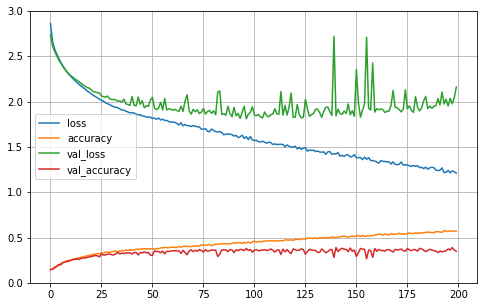

In [10]:
pd.DataFrame(reg_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()

### From the plot, it is obvious that we did not need 200 epochs. Judging from the validation and training loss, the training loss kept reducing but that is expected as you keep running longer, from the validation loss, its best value was way beofre the 200 epoch. Now with the accuracies, the training set also ended up better than the validation set but that is also expected but looking at the validation set, the elbow performance(aprrox. epoch==25) was hit way before the 200 epoch and it just oscillated around the same value for the remianing of the runtime

In [11]:
val = model.evaluate(X_test_prep, y_test)
print("Accuracy: ", val[1])

68/68 [==============================] - 0s 3ms/step - loss: 2.1419 - accuracy: 0.3538
Accuracy:  0.3537822961807251


### The random forest approximately 10% better than the neural network. At first , I thought the neural network could be made better by increasing the number of hidden layers , and I attempted to verify that by doubling my loop counter and it slightly improved the accuracy(approximately by 0.5%).To confirm my suspicion, I squared the number of hidden layers and the accuracy actually got less so that means that increasing the hidden layers won't neccessary make it run better, but then I considered maybe squaring is a bit too much so I tripled the initial value and there was an increase from when the value was doubled, therefore increasing the number of hidden layers will make it better but to a certain extent before it starts to probably overfit. Another way to make it better is by increasing the size of the training dataset. We can do that by increasing the amount of initial data or we can also change the split value, maybe instead of 20% of the dataset, we can make it 15% so the training dataset has more data so it can generalize better. But then an hour later, I got another idea, why not increase the number of nodes in each hidden layer? So, I doubled the number of nodes in each hidden layer but that failed, I got less accurate with more nodes in the hidden layers but then multiplied it by 1.5 and the accuracy increased by 1.3%, so just like the hidden layers, increasing the number of nodes will increase accuracy to a certain extent